In [1]:
import pandas as pd
import numpy as np
from utils import *
import matplotlib.pyplot as plt
import datetime
features = pd.read_csv('features.csv',sep=";")
targets = pd.read_csv('targets.csv',sep=",")
features['StartTime'] = pd.to_datetime(features['StartTime'])
targets['StartTime'] = pd.to_datetime(targets['StartTime'])
features = features.drop('CellId',axis=1)#Same as Band

## Initial Data Analysis

In [2]:
display(features.describe())
display(features.dtypes)

,Band,PL_00,PL_01,PL_02,PL_03,PL_04,PL_05,PL_06,PL_07,PL_08,...,PL_11,PL_12,PL_13,PL_14,PL_15,PL_16,PL_17,PL_18,PL_19,PL_20
count,23416.000000,23408.000000,23408.000000,23408.000000,23408.000000,23408.000000,23408.000000,23408.000000,23408.000000,23408.000000,...,23408.000000,23408.000000,23408.000000,23408.000000,23408.000000,23408.000000,23408.000000,23408.000000,23408.000000,23408.000000
mean,1750.000000,0.007348,0.008587,0.036697,0.272386,4.163619,63.712919,2030.936774,3780.167208,4362.281827,...,12135.284134,16621.672078,21769.731844,21331.408920,12593.011834,4620.605306,3238.195403,2295.018754,914.902597,125.312415
std,638.370898,0.471095,0.292840,0.821941,3.662791,34.805876,190.206189,14253.681192,10542.102521,12021.272761,...,23578.177793,33320.614060,37209.256762,33544.185194,22067.074255,8978.773480,6448.544138,5061.327161,2554.319416,962.292382
min,800.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1550.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,65.000000,156.000000,...,560.000000,827.000000,1850.500000,2719.000000,1690.750000,639.000000,261.000000,118.000000,27.000000,1.000000
50%,1800.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,163.500000,580.500000,965.500000,...,4113.500000,5269.500000,8197.000000,9611.000000,5855.000000,2189.500000,1342.000000,717.500000,215.000000,8.000000
75%,2000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,55.000000,704.000000,4521.000000,3930.250000,...,13601.000000,18247.250000,25209.250000,26471.500000,15430.500000,5790.000000,4002.500000,2520.000000,877.000000,49.000000
max,2600.000000,54.000000,24.000000,70.000000,343.000000,4676.000000,5460.000000,304455.000000,259539.000000,253220.000000,...,893332.000000,891152.000000,845288.000000,680096.000000,537181.000000,353422.000000,192341.000000,130257.000000,90964.000000,79697.000000


StartTime    datetime64[ns]
Band                  int64
PL_00               float64
PL_01               float64
PL_02               float64
PL_03               float64
PL_04               float64
PL_05               float64
PL_06               float64
PL_07               float64
PL_08               float64
PL_09               float64
PL_10               float64
PL_11               float64
PL_12               float64
PL_13               float64
PL_14               float64
PL_15               float64
PL_16               float64
PL_17               float64
PL_18               float64
PL_19               float64
PL_20               float64
dtype: object

In [3]:
#Features has a smaller time window than targets

min_startTime = features['StartTime'].min()
max_startTime = features['StartTime'].max()

print(min_startTime)
print(max_startTime)

2020-08-01 00:00:00
2020-09-30 23:45:00


In [4]:
features[features['PL_00'].isna()]

,StartTime,Band,PL_00,PL_01,PL_02,PL_03,PL_04,PL_05,PL_06,PL_07,...,PL_11,PL_12,PL_13,PL_14,PL_15,PL_16,PL_17,PL_18,PL_19,PL_20
15132,2020-09-09 09:45:00,2600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15133,2020-09-09 09:45:00,1800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15134,2020-09-09 09:45:00,800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15135,2020-09-09 09:45:00,1800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21168,2020-09-25 03:30:00,2600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21169,2020-09-25 03:30:00,1800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21170,2020-09-25 03:30:00,800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21171,2020-09-25 03:30:00,1800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


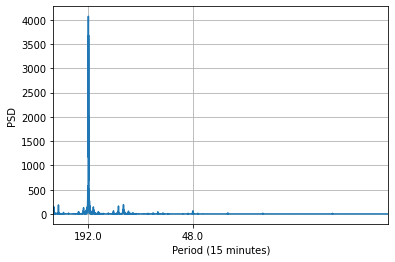

In [5]:
def computePSD(Y):
    yAC = np.correlate(Y-np.mean(Y), Y-np.mean(Y), mode='full')
    yAC = yAC/np.max(yAC) # not necessary, but scales large values
    return np.fft.fft(yAC)
  
fig = plt.figure(); 
ax = fig.add_subplot(111)
PSD = computePSD(targets['NumberOfVehicles'].to_numpy())
x_psd = np.arange(0,len(PSD))/len(PSD)
plt.plot(x_psd,np.abs(PSD))
plt.ylabel('PSD'); plt.xlabel('Period (15 minutes)'); ax.grid();
plt.xticks([1/round(1/x_psd[np.abs(PSD).argmax()]),1/48],1/np.array([1/round(1/x_psd[np.abs(PSD).argmax()]),1/48]))
plt.xlim([0,0.05])

plt.show();

The number of vehicles is periodic, with the biggest component having a frequency of a 1 day, and the second biggest component having a frequency of 1/2 day.

### Preprocessing

##### Feature imputation

In [6]:
print('Targets when features where NaN')
display(targets[targets['StartTime'].isin(features[features['PL_00'].isna()]['StartTime'])])

print('Targets 15 mins before features where NaN')
display(targets[targets['StartTime'].isin(features[features['PL_00'].isna()]['StartTime']-datetime.timedelta(minutes=15))])

print('Targets 15 mins after features where NaN')
display(targets[targets['StartTime'].isin(features[features['PL_00'].isna()]['StartTime']+datetime.timedelta(minutes=15))])

Targets when features where NaN


,StartTime,StationId,NumberOfVehicles
30676,2020-09-09 09:45:00,101,297
30677,2020-09-09 09:45:00,102,303
33685,2020-09-25 03:30:00,102,53


Targets 15 mins before features where NaN


,StartTime,StationId,NumberOfVehicles
30674,2020-09-09 09:30:00,102,286
30675,2020-09-09 09:30:00,101,327
33683,2020-09-25 03:15:00,102,37
33684,2020-09-25 03:15:00,101,1


Targets 15 mins after features where NaN


,StartTime,StationId,NumberOfVehicles
30678,2020-09-09 10:00:00,102,314
30679,2020-09-09 10:00:00,101,278
33686,2020-09-25 03:45:00,102,40
33687,2020-09-25 03:45:00,101,1


##### Since target values for the missing feature values are somewhere in between the previous and next 15 minute time intervals, let's impute the mean of the feature values for these 2 entries

In [7]:
missing_timestamps = list(features[features['PL_00'].isna()]['StartTime'])

for missing_timestamp in missing_timestamps:
    before_15 = missing_timestamp - datetime.timedelta(minutes=15)
    before_15_features = features[features['StartTime'] == before_15]
    after_15 = missing_timestamp + datetime.timedelta(minutes=15)
    after_15_features = features[features['StartTime'] == after_15]
    features.loc[features['StartTime']==missing_timestamp,1:] = (after_15_features.values[:,1:] + before_15_features.values[:,1:])/2

In [8]:
features[features['StartTime'].isin(missing_timestamps)]

,StartTime,Band,PL_00,PL_01,PL_02,PL_03,PL_04,PL_05,PL_06,PL_07,...,PL_11,PL_12,PL_13,PL_14,PL_15,PL_16,PL_17,PL_18,PL_19,PL_20
15132,2020-09-09 09:45:00,2600.0,0.0,0.0,0.0,0.0,0.0,7.5,202.5,1019.5,...,2781.5,3063.5,53278.0,57576.5,6572.0,628.0,211.5,155.5,31.0,1.5
15133,2020-09-09 09:45:00,1800.0,0.0,0.0,0.0,0.0,0.0,2.0,1355.0,10553.5,...,89848.0,85652.5,309542.0,125600.5,15813.5,6336.5,4856.5,3346.0,1450.0,262.5
15134,2020-09-09 09:45:00,800.0,0.0,0.0,0.0,1.5,7.0,162.5,432.5,341.5,...,5338.5,6635.5,5482.0,34873.0,15066.5,6609.5,9436.0,3463.5,901.5,12.0
15135,2020-09-09 09:45:00,1800.0,0.0,0.0,0.0,0.0,0.0,0.5,317.5,1150.0,...,5451.0,6849.5,4829.5,3865.5,2800.0,885.5,372.5,373.0,108.5,11.0
21168,2020-09-25 03:30:00,2600.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21169,2020-09-25 03:30:00,1800.0,0.0,0.0,0.0,0.0,2.5,22.0,1685.0,6366.0,...,3214.5,5141.5,11466.0,11191.0,4161.5,2169.0,678.0,1124.5,1414.5,82.5
21170,2020-09-25 03:30:00,800.0,0.0,0.0,0.0,0.0,2.5,39.5,137.5,129.0,...,5068.0,94.5,66.0,19657.5,1427.0,227.0,303.0,101.5,0.0,0.0
21171,2020-09-25 03:30:00,1800.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
#Let's check if every timestamp is present in the feature and target data

import datetime
date = min_startTime
all_dates = [date]
while date != max_startTime:
    date = date + datetime.timedelta(minutes=15)
    all_dates.append(date)

In [10]:
all_featureStartTime = features['StartTime']
all_featureStartTime_set = [x for x in sorted(list(set(all_featureStartTime)))]

all_targetStartTime = targets['StartTime']
all_targetStartTime_set = [x for x in sorted(list(set(all_targetStartTime)))]

print("Missing feature startTime")
missing_timeStamp_features = [x for x in all_dates if x not in all_featureStartTime_set]
print(missing_timeStamp_features)

print("Missing target startTime")
missing_timeStamp_targets = [x for x in all_dates if x not in all_targetStartTime_set]

print(missing_timeStamp_targets)

Missing feature startTime
[Timestamp('2020-09-25 00:15:00'), Timestamp('2020-09-25 00:30:00')]
Missing target startTime
[Timestamp('2020-08-03 12:00:00'), Timestamp('2020-08-03 12:15:00'), Timestamp('2020-08-03 12:30:00'), Timestamp('2020-08-03 12:45:00'), Timestamp('2020-08-03 13:00:00'), Timestamp('2020-08-03 13:15:00'), Timestamp('2020-08-03 13:30:00'), Timestamp('2020-08-03 13:45:00'), Timestamp('2020-08-03 14:00:00'), Timestamp('2020-08-03 14:15:00'), Timestamp('2020-08-03 14:30:00'), Timestamp('2020-08-03 14:45:00'), Timestamp('2020-08-03 15:00:00'), Timestamp('2020-08-03 15:15:00'), Timestamp('2020-08-03 15:30:00'), Timestamp('2020-08-03 15:45:00'), Timestamp('2020-08-03 16:00:00'), Timestamp('2020-08-03 16:15:00'), Timestamp('2020-08-03 16:30:00'), Timestamp('2020-08-03 16:45:00'), Timestamp('2020-08-03 17:00:00'), Timestamp('2020-08-03 17:15:00'), Timestamp('2020-08-03 17:30:00'), Timestamp('2020-08-03 17:45:00'), Timestamp('2020-08-03 18:00:00'), Timestamp('2020-08-03 18:15:0

##### Due to the fact that our target variable is missing a big portion of 3rd of August, let's remove the 3rd of August. This shouldn't be too much of a problem due to the fact that the periodicity of the data is daily (see PSD further down in analysis)

In [11]:
targets = targets[~(targets['StartTime'].dt.date == datetime.date(2020,8,3))]
features = features[~(features['StartTime'].dt.date == datetime.date(2020,8,3))]

##### Missing feature timestamps imputation

In [12]:
#Since we have 2 consecutive timestamps with missing values, let's take the closest existing value and forward/backward fill it

missing_timestamp_1 = missing_timeStamp_features[0]
    

before_15 = missing_timestamp_1 - datetime.timedelta(minutes=15)
df_impute_1 = features[features['StartTime'] == before_15].copy()
df_impute_1['StartTime'] = missing_timestamp_1
    
missing_timestamp_2 = missing_timeStamp_features[1]

    
after_15 = missing_timestamp + datetime.timedelta(minutes=15)
df_impute_2 = features[features['StartTime'] == after_15].copy()
df_impute_2['StartTime'] = missing_timestamp_2

features = features.append(df_impute_1)
features = features.append(df_impute_2)

features = features.sort_values(['StartTime','Band'])

- The targets dataset contains three columns, the timestamp 
- StationId: inbound and outbound, these will need to be added since feature vectors can't differentiate between inbound and outbound

In [13]:
#Pre processing, groupby start Time and add together vehicle count per stationid
targets.head()

,StartTime,StationId,NumberOfVehicles
0,2020-04-01 00:00:00,101,28
1,2020-04-01 00:00:00,102,44
2,2020-04-01 00:15:00,102,40
3,2020-04-01 00:15:00,101,22
4,2020-04-01 00:30:00,101,15


In [14]:
#We only want the targets which is within the same time frame as our features

features = features[features['StartTime'].isin(targets['StartTime'])]

targets = targets[targets['StartTime'].isin(features['StartTime'])]
targets = targets = groupby_stationid(targets)
targets = targets.set_index('StartTime')
features_pivot = groupby_band(features,mode='pivot_band')
features_pivot.columns = [x.replace('.0','') for x in features_pivot.columns]
features_merge = groupby_band(features,mode='aggregate_mean')
features_merge = features_merge.set_index('StartTime')

In [15]:
display(features_pivot.head(1))
display(features_merge.head(1))
display(targets.head(1))

,PL_00|800,PL_00|1800,PL_00|2600,PL_01|800,PL_01|1800,PL_01|2600,PL_02|800,PL_02|1800,PL_02|2600,PL_03|800,...,PL_17|2600,PL_18|800,PL_18|1800,PL_18|2600,PL_19|800,PL_19|1800,PL_19|2600,PL_20|800,PL_20|1800,PL_20|2600
StartTime,,,,,,,,,,,,,,,,,,,,,
2020-08-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,164.0,40.0,11500.5,2.0,1.0,8069.5,10.0,0.0,728.5,0.0


,PL_00,PL_01,PL_02,PL_03,PL_04,PL_05,PL_06,PL_07,PL_08,PL_09,...,PL_11,PL_12,PL_13,PL_14,PL_15,PL_16,PL_17,PL_18,PL_19,PL_20
StartTime,,,,,,,,,,,,,,,,,,,,,
2020-08-01,0.0,0.0,0.0,0.0,0.0,19.0,123.25,1517.75,1267.5,1156.25,...,1272.25,3478.0,14649.75,11249.5,4872.5,1896.75,2369.5,5760.75,4037.5,364.25


,NumberOfVehicles
StartTime,
2020-08-01,267


In [16]:
X_train_merge = features_merge.loc['2020-08-01':'2020-09-20']
y_train_merge = targets[['NumberOfVehicles']].loc['2020-08-01':'2020-09-20']
#X_val_merge = features_merge.loc['2020-09-13':'2020-09-20']
#y_val_merge = targets['NumberOfVehicles'].loc['2020-09-13':'2020-09-20']
X_test_merge = features_merge.loc['2020-09-21':'2020-09-30']
y_test_merge = targets[['NumberOfVehicles']].loc['2020-09-21':'2020-09-30']

X_train_pivot = features_pivot.loc['2020-08-01':'2020-09-20']
y_train_pivot = targets[['NumberOfVehicles']].loc['2020-08-01':'2020-09-20']
#X_val_pivot = features_pivot.loc['2020-09-13':'2020-09-20']
#y_val_pivot = targets['NumberOfVehicles'].loc['2020-09-13':'2020-09-20']
X_test_pivot = features_pivot.loc['2020-09-21':'2020-09-30']
y_test_pivot = targets[['NumberOfVehicles']].loc['2020-09-21':'2020-09-30']

In [17]:
from sklearn.preprocessing import StandardScaler

sc_features_merge = StandardScaler()
X_train_merge = pd.DataFrame(sc_features_merge.fit_transform(X_train_merge),columns=X_train_merge.columns,index=X_train_merge.index)
X_test_merge = pd.DataFrame(sc_features_merge.transform(X_test_merge),columns=X_test_merge.columns,index=X_test_merge.index)

sc_features_pivot = StandardScaler()
X_train_pivot = pd.DataFrame(sc_features_pivot.fit_transform(X_train_pivot),columns=X_train_pivot.columns,index=X_train_pivot.index)
X_test_pivot = pd.DataFrame(sc_features_pivot.transform(X_test_pivot),columns=X_test_pivot.columns,index=X_test_pivot.index)

sc_target = StandardScaler()

y_train_merge = y_train_pivot = pd.DataFrame(sc_target.fit_transform(y_train_merge.values.reshape(-1,1)), columns=y_train_merge.columns,index=y_train_merge.index)


#### Further Data Analysis

##### Feature Importance

The relationship between pathloss and distance between sensor and transceiver can be calculated using COST Hata model. https://en.wikipedia.org/wiki/COST_Hata_model#:~:text=The%20COST%20Hata%20model%20is,EU%20funded%20research%20project%20ca.

#### $$L_b = 46.3 + 33.9 log_{10}\frac{f}{MHz} - 13.82 log_{10}\frac{h_B}{m} - \alpha(h_R,f)+\big(44.9 - 6.55 log_{10}\frac{h_B}{m}\big)log_{10}\frac{d}{km}+C_m$$
#### $$log_{10}(\frac{d}{km}) =\frac{(L_b  - 46.3 - 33.9 log_{10}\frac{f}{MHz} + 13.82 log_{10}\frac{h_B}{m} + \alpha(h_R,f))-C_m}{\big(44.9 - 6.55 log_{10}\frac{h_B}{m}\big)}$$

Where 
- $L_b$ = Median path loss in dB
- $f$ = Frequency of Transmission. (MHz)
- $h_B$ = Base station antenna effective height (m)
- $d$ = Link distance (what we want)
- $h_R$ = Mobile station antenna effective height (m) 
- $\alpha(h_R,f) = 3.2(log_{10}(11.75h_R))^2 - 4.97$ : Mobile station antenna height correction factor as described in Hata model for urban areas.
- $C_m$ = 0 dB for medium cities

In [18]:
def cost_hata_distance(L,band_mhz,height_basestation,antenna_height,Cm):
    d = 1000*10**((L - 46.3 - 33.9*np.log10(band_mhz) + 13.82*np.log10(height_basestation) + (3.2*(np.log10(11.75*antenna_height))**2 - 4.97) - Cm)/(44.9-6.55*np.log10(height_basestation)))
    return d

By iterating over each band and each pathloss bin, we can find which bin has a distance closest to 450 m, which is the true distance between user and receiver

In [19]:
db_dict = {
'PL_00':50,
'PL_01':55,
'PL_02':60,
'PL_03':65,
'PL_04':70,
'PL_05':75,
'PL_06':80,
'PL_07':85,
'PL_08':90,
'PL_09':95,
'PL_10':100,
'PL_11':105,
'PL_12':110,
'PL_13':115,
'PL_14':120,
'PL_15':125,
'PL_16':130,
'PL_17':135,
'PL_18':140,
'PL_19':145,
'PL_20':150,
}



In [20]:
db_dataframe=pd.DataFrame()
band_list = []
pl_l = []
d_l = []
for band in [800,1800,2600]:
    for k,v in db_dict.items():
        d = cost_hata_distance(L=v,band_mhz=band,height_basestation=47,antenna_height=1.8,Cm=0)
        pl_l.append(k)
        d_l.append(d)
        band_list.append(band)
db_dataframe['band']=band_list
db_dataframe['PL'] = pl_l
db_dataframe['distance'] = d_l


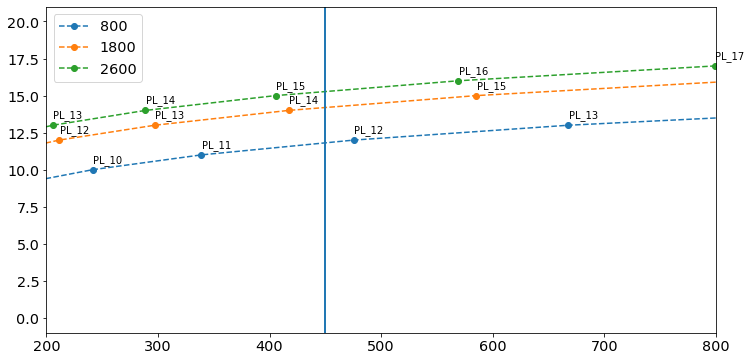

In [21]:
params = {'legend.fontsize': 'x-large','figure.figsize': (12, 6),
         'axes.labelsize': 'x-large','xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
all_pl_cols = [x for x in features.columns if 'PL' in x]
plt.rcParams.update(params)
y = np.arange(len(all_pl_cols))
fig, axs = plt.subplots(1, 1, sharey=False ,tight_layout=False)

for band in [800,1800,2600]:
    x = db_dataframe[db_dataframe['band'] == band]['distance']
    axs.plot(x,y,'o--',label=str(band))
    axs.axvline(x=450,linestyle='-')
    axs.set_xlim(200,800)
    for i,txt in enumerate(all_pl_cols):
        x_txt = list(x)[i]
        if x_txt >= 200 and x_txt <= 800:
            axs.text(list(x)[i]+0.5, list(y)[i]+0.5, txt)

plt.legend()
plt.show();

Based on the COST Hata model, we could expect that the most valuable information lies within the features closest to the 450m line
Let's see if this if this is shared with some other methods of feature importance.

In [22]:
import heapq
x0 = 450
n_features = 5
top_n = heapq.nsmallest(n_features, db_dataframe['distance'], key=lambda x: abs(x-x0))
top_db = db_dataframe[db_dataframe['distance'].isin(top_n)]
top_db['filter features'] = top_db['PL']+'|'+top_db['band'].astype(str)
hata_top_n_features = top_db['filter features'].values

/opt/anaconda3/envs/newenv/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [23]:
from collections import defaultdict
time_shift_df_dict = defaultdict(dict)
all_pivot_cols = [x for x in features_pivot.columns if 'PL' in x]
number_of_timesteps = 96
for col in all_pivot_cols:
    train_one_col = X_train_pivot[[col]]
    test_one_col = X_test_pivot[[col]]
    train_one_col.columns = ['t']
    test_one_col.columns = ['t']
    for t in range(1,number_of_timesteps):
        train_one_col['t-{}'.format(t)] = train_one_col['t'].shift(t)
        test_one_col['t-{}'.format(t)] = test_one_col['t'].shift(t)
    train_one_col['y'] = y_train_pivot['NumberOfVehicles']
    test_one_col['y'] = y_test_pivot['NumberOfVehicles']
    #train_one_col['isWeekend'] = list((train_one_col.reset_index()['StartTime'].dt.weekday > 4).astype(int))
    #test_one_col['isWeekend'] = list((test_one_col.reset_index()['StartTime'].dt.weekday > 4).astype(int))
    time_shift_df_dict[col]['train'] = train_one_col.iloc[number_of_timesteps:,:]
    time_shift_df_dict[col]['test'] = test_one_col.iloc[number_of_timesteps:,:]

/opt/anaconda3/envs/newenv/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/opt/anaconda3/envs/newenv/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


In [24]:
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
r2_tuple_list = []
pred_dict = {}
### Predict the target variable using each column in pivoted data, let's see which column gives highest R2.
for col in all_pivot_cols:
    clf = xgb.XGBRegressor()
    X_train_col = time_shift_df_dict[col]['train']
    X_test_col = time_shift_df_dict[col]['test']
    y_test_col = X_test_col['y']
    X_test_col = X_test_col.drop('y',axis=1)
    y_train_col = X_train_col['y']
    X_train_col = X_train_col.drop('y',axis=1)
    clf.fit(X_train_col,y_train_col)
    predicted = clf.predict(X_test_col)
    predicted = sc_target.inverse_transform(predicted)
    pred_dict[col] = predicted
    r2 = r2_score(y_test_col, predicted)
#    print('*** KNN (K={}) COL:{}***'.format(k,col))
#    print('MAE = ', mean_absolute_error(y_test_col, predicted))
#    print('MSE = ', mean_squared_error(y_test_col, predicted))
#    print('R2  = ', r2)
    r2_tuple_list.append((col,r2))    

In [25]:
r2_tuple_list_sorted = sorted(r2_tuple_list,key=lambda x: x[1],reverse=True)
top_n_features_xgb = [x[0] for x in r2_tuple_list_sorted[:n_features]]
print([x for x in r2_tuple_list_sorted[:n_features]])

[('PL_10|2600', 0.8844656470903471), ('PL_17|2600', 0.8830018193076627), ('PL_11|2600', 0.8779625038193892), ('PL_15|2600', 0.8691078147951977), ('PL_09|2600', 0.8673132974275496)]


In [26]:
from sklearn.feature_selection import SelectKBest, chi2, f_classif

from mlxtend.feature_selection import SequentialFeatureSelector as SFS

D = 5
clf = xgb.XGBRegressor()

sfs1 = SFS(clf, 
           k_features=D, 
           forward=True, 
           floating=False, 
           verbose=2,
           n_jobs=-1,
           scoring='r2',
           )

sfs1.fit(X_train_pivot,y_train_pivot,custom_feature_names=X_train_pivot.columns)
print("Features selected are:")
print(sfs1.k_feature_names_)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done  63 out of  63 | elapsed:    6.1s finished

[2020-12-08 15:57:38] Features: 1/5 -- score: 0.5237341567270042[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done  62 out of  62 | elapsed:    6.7s finished

[2020-12-08 15:57:45] Features: 2/5 -- score: 0.6491737718404957[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done  61 out of  61 | elapsed:    8.5s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  61 out of  61 | elapsed:    8.5s finished

[2020-12-08 15:57:53] Features: 3/5 -- score: 0.6694509365850287[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=

Features selected are:
('PL_05|800', 'PL_09|2600', 'PL_10|800', 'PL_10|1800', 'PL_17|2600')


[Parallel(n_jobs=-1)]: Done  59 out of  59 | elapsed:   11.6s finished

[2020-12-08 15:58:15] Features: 5/5 -- score: 0.7146146286056415

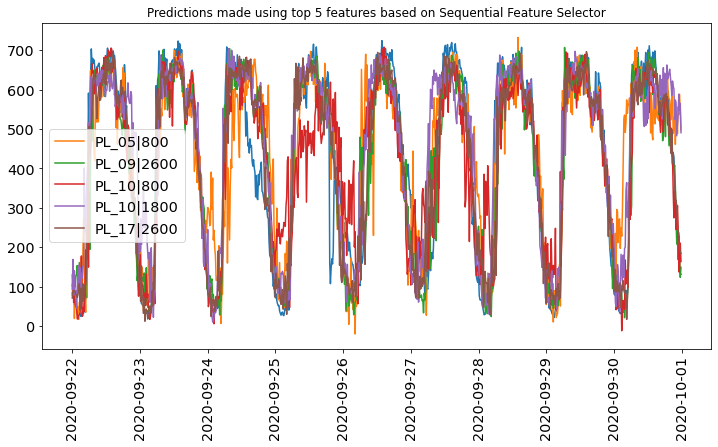

In [36]:
plt.plot(y_test_col)
for top_n_feature in sfs1.k_feature_names_:
    y_df = pd.DataFrame(pred_dict[top_n_feature],index=y_test_col.index)
    plt.plot(y_df,label=top_n_feature)
plt.xticks(rotation=90)
plt.title('Predictions made using top 5 features based on Sequential Feature Selector')
plt.legend()

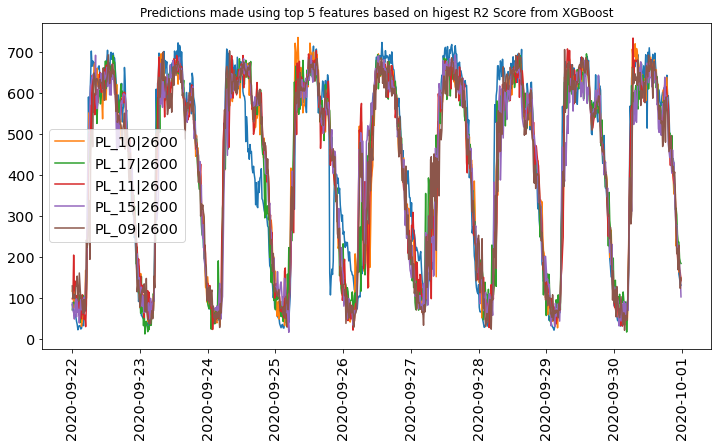

In [35]:
plt.plot(y_test_col)
for top_n_feature in top_n_features_xgb:
    y_df = pd.DataFrame(pred_dict[top_n_feature],index=y_test_col.index)
    plt.plot(y_df,label=top_n_feature)
plt.title('Predictions made using top 5 features based on higest R2 Score from XGBoost')
plt.xticks(rotation=90)
plt.legend()

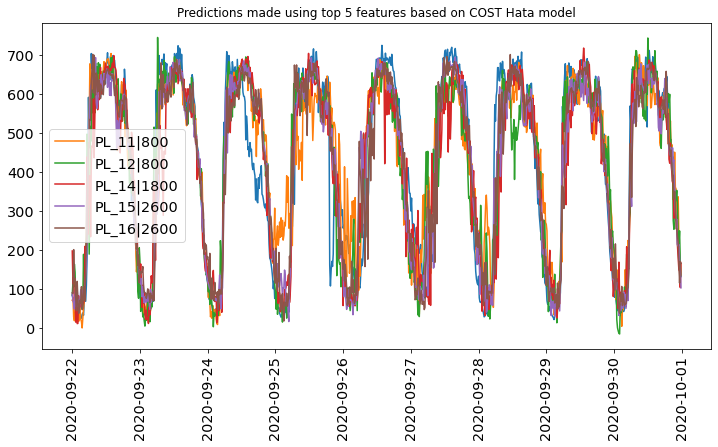

In [34]:
plt.plot(y_test_col)
for top_n_feature in hata_top_n_features:
    y_df = pd.DataFrame(pred_dict[top_n_feature],index=y_test_col.index)
    plt.plot(y_df,label=top_n_feature)
plt.xticks(rotation=90)
plt.title('Predictions made using top 5 features based on COST Hata model')
plt.legend()

Based on these visualizations, it looks like the R2 method with XGRegressor gives the best features.